In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Defining a PD matrix

In [29]:
#MATRIX PARAMETERS (nxn)
n = 5

#rank of the PSD matrix (r<=n), dim = (nxn)
rank = n

#QR factorization
np.random.seed(0)
q, r = np.linalg.qr(np.random.randn(n, n))
q = q[:,:rank]
S = np.diag(np.linspace(0,2,rank))
A = q@S@q.T

# eigenvalues and eigenvectors | # eig_val[i] ==> corr. eig_vec[:,i]
eig_val, eig_vec = np.linalg.eig(A)

#dominant eigenvector
u1 = eig_vec[:,0]
u1 = u1/np.linalg.norm(u1)
u1,eig_val

(array([-0.53886375,  0.29852834, -0.04400088, -0.10192725,  0.77985989]),
 array([5.55111512e-17, 5.00000000e-01, 1.00000000e+00, 1.50000000e+00,
        2.00000000e+00]))

# ADAM optimizer

In [39]:
#initialize the values of the parameters
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.999 
epsilon = 1e-8


# Rayleigh quotient | Objective function
def func(w):
    return w.T@A@w/np.linalg.norm(w)**2


#gradient of Rayleigh quotient
def grad_func(w):
    return 2*(A@w - (w.T@A@w/np.linalg.norm(w)**2)*w)/(np.linalg.norm(w)**2)


#initialize the vector
np.random.seed(0)
theta = np.random.rand(A.shape[1])
m_t = np.zeros((A.shape[1]))
v_t = np.zeros((A.shape[1]))
res_adam = []
max_iters = 1000
t = 0


#till it gets converged
for t in range(1,max_iters):
    
    theta = theta/np.linalg.norm(theta)
    
    #computes the gradient of the stochastic function
    g_t = grad_func(theta) 
    
    res_adam.append(1 - (theta.dot(u1))**2)
    #updates the moving averages of the gradient
    m_t = beta_1*m_t + (1-beta_1)*g_t
    #updates the moving averages of the squared gradient
    v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t)
    
    
    #calculates the bias-corrected estimates
    m_cap = m_t/(1-(beta_1**t))
    #calculates the bias-corrected estimates
    v_cap = v_t/(1-(beta_2**t))
    
    
    theta_prev = theta.copy()
    theta_prev = theta_prev/np.linalg.norm(theta_prev)
    
#     print(theta_prev,'\n',theta_prev)
    #updates the parameters
    for i in range(len(theta)):
        theta[i] = theta[i] - (alpha*m_cap[i])/(np.sqrt(v_cap[i])+epsilon)
        
theta

array([-0.53886375,  0.29852834, -0.04400088, -0.10192725,  0.77985989])

In [43]:
#final residual
1 - (theta.dot(u1))**2

0.0

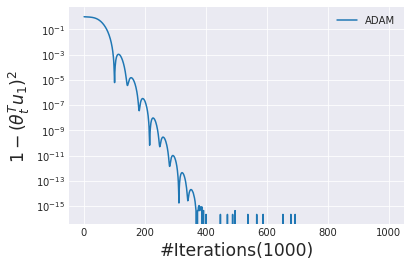

In [44]:
sns.set_style('darkgrid')
plt.plot(list(range(1,max_iters)), res_adam, label=f'ADAM')
plt.xlabel(f"#Iterations({max_iters})", fontsize = 'xx-large')
plt.ylabel(r"$1 - (\theta_t^Tu_1)^2$", fontsize = 'xx-large')
plt.yscale('log')
plt.legend(loc='upper right')
plt.show()